In [27]:


import better 

import numpy as np

import EFIE_solver as efie

light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 146
omega = 2 * np.pi * frequency
incident_voltage = 10

class antenna:
    def __init__(self, position, angle, length, source_position, radius):
        self.position = position
        self.angle = angle
        self.length = length
        self.source_position = source_position
        self.radius = radius

wavelength = light_speed / frequency
delta_r = light_speed / frequency / 5e2
test = antenna(np.array([[0.0, 0.0], [0.15*wavelength, 0.0], [0.3*wavelength, 0.0], [0.0, wavelength/2+0.15*wavelength], [0.15*wavelength, wavelength/2+0.15*wavelength], [0.3*wavelength, wavelength/2+0.15*wavelength], [0.0, -wavelength/2-0.15*wavelength], [0.15*wavelength, -wavelength/2-0.15*wavelength], [0.3*wavelength, -wavelength/2-0.15*wavelength]]), 
               np.array([np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2]), 
               np.array([wavelength/2, wavelength/2, wavelength/2, wavelength/2, wavelength/2, wavelength/2, wavelength/2, wavelength/2, wavelength/2]), 
               np.array([[0.0, 0.0]]), 
               np.array([3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3, 3.175e-3]))


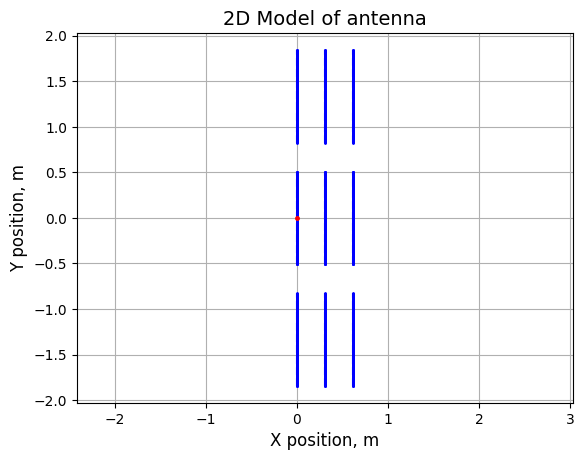

In [28]:
import geometry as gm
R_block, R = gm.calculate_positions(antenna=test, delta_r=delta_r)
gm.plot_antenna(R_block=R_block, R=R, antenna=test, delta_r=delta_r)

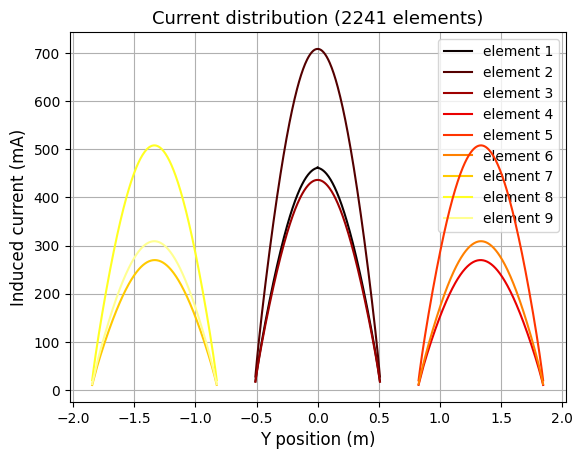

In [29]:
current_block, current = efie.directional_pattern(test, incident_voltage, frequency, delta_r)
gm.current_disribution_together(R_block, current_block)
gm.current_distribution_2d(R, current)

In [30]:
element_num = []
for i in range (len(R_block)):
    element_num.append(len(R_block[i]))
element_num = np.array(element_num)
    
E = [0]*len(test.length)
for m in range (len(test.length)):
    z0 = np.arange(element_num[m]) * delta_r - test.length[m]/2
    Ei = lambda phi : np.sum(current_block[m]*np.exp(1j* omega/light_speed *R_block[m][:,0]*np.cos(phi))*np.exp(-1j*R_block[m][:,1]*np.sin(phi)))
    phi = np.linspace(1e-6, 2*np.pi-1e-6, 1000)
    E[m] = np.array([Ei(phi_i) for phi_i in phi])*(np.exp(delta_r* omega/light_speed *np.sin(phi))-1)/(omega/light_speed *np.sin(phi))
E_total = np.abs(np.sum(np.array(E), axis=0))

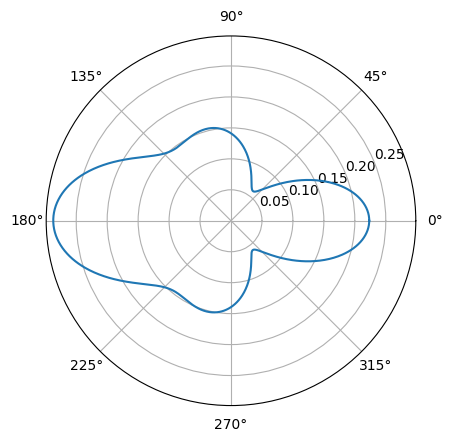

In [31]:
import matplotlib.pyplot as plt 
plt.polar(phi, (E_total))